In [1]:
import pandas as pd
import pickle

df = pd.read_csv('../Data/ipl.csv')

In [2]:
df.head()

mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222  
1            1               0        0            0    222  
2            2               0        0            0    222  
3            2               0        0            0    222  
4            2               0        0            0    222

In [3]:

df.describe()

mid          runs       wickets         overs   runs_last_5  \
count  76014.000000  76014.000000  76014.000000  76014.000000  76014.000000   
mean     308.627740     74.889349      2.415844      9.783068     33.216434   
std      178.156878     48.823327      2.015207      5.772587     14.914174   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%      154.000000     34.000000      1.000000      4.600000     24.000000   
50%      308.000000     70.000000      2.000000      9.600000     34.000000   
75%      463.000000    111.000000      4.000000     14.600000     43.000000   
max      617.000000    263.000000     10.000000     19.600000    113.000000   

       wickets_last_5       striker   non-striker         total  
count    76014.000000  76014.000000  76014.000000  76014.000000  
mean         1.120307     24.962283      8.869287    160.901452  
std          1.053343     20.079752     10.795742     29.246231  
min          0.000000      0.000000      0.000000     67.000000  
25%          0.000000     10.000000      1.000000    142.000000  
50%          1.000000     20.000000      5.000000    162.000000  
75%          2.000000     35.000000     13.000000    181.000000  
max          7.000000    175.000000    109.000000    263.000000

In [4]:
# Data cleaning
#remove unwanted columns
features_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=features_to_remove, axis=1, inplace=True)
df.head()

date               bat_team                    bowl_team  runs  \
0  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     1   
1  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     1   
2  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     2   
3  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     2   
4  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     2   

   wickets  overs  runs_last_5  wickets_last_5  total  
0        0    0.1            1               0    222  
1        0    0.2            1               0    222  
2        0    0.2            2               0    222  
3        0    0.3            2               0    222  
4        0    0.4            2               0    222

In [5]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
#keeping only the teams that play every year
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(consistent_teams))& (df['bowl_team'].isin(consistent_teams))]
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [7]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [8]:
#Remove the first 5 overs data in every match
df = df[df['overs']>=5.0]
df.head()

date               bat_team                    bowl_team  runs  \
32  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
33  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
34  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
35  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
36  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   

    wickets  overs  runs_last_5  wickets_last_5  total  
32        0    5.1           59               0    222  
33        1    5.2           59               1    222  
34        1    5.3           59               1    222  
35        1    5.4           59               1    222  
36        1    5.5           58               1    222

In [9]:
#conver date from string to datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.head()

date               bat_team                    bowl_team  runs  \
32 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
33 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
34 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
35 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
36 2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   

    wickets  overs  runs_last_5  wickets_last_5  total  
32        0    5.1           59               0    222  
33        1    5.2           59               1    222  
34        1    5.3           59               1    222  
35        1    5.4           59               1    222  
36        1    5.5           58               1    222

In [10]:
#feature engineering 
#convert categorical features using onehot encoding
encoded_df = pd.get_dummies(data=df, columns = ['bat_team', 'bowl_team'])
encoded_df.head()

date  runs  wickets  overs  runs_last_5  wickets_last_5  total  \
32 2008-04-18    61        0    5.1           59               0    222   
33 2008-04-18    61        1    5.2           59               1    222   
34 2008-04-18    61        1    5.3           59               1    222   
35 2008-04-18    61        1    5.4           59               1    222   
36 2008-04-18    61        1    5.5           58               1    222   

    bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
32                             0                          0   
33                             0                          0   
34                             0                          0   
35                             0                          0   
36                             0                          0   

    bat_team_Kings XI Punjab  ...  bat_team_Royal Challengers Bangalore  \
32                         0  ...                                     0   
33                         0  ...                                     0   
34                         0  ...                                     0   
35                         0  ...                                     0   
36                         0  ...                                     0   

    bat_team_Sunrisers Hyderabad  bowl_team_Chennai Super Kings  \
32                             0                              0   
33                             0                              0   
34                             0                              0   
35                             0                              0   
36                             0                              0   

    bowl_team_Delhi Daredevils  bowl_team_Kings XI Punjab  \
32                           0                          0   
33                           0                          0   
34                           0                          0   
35                           0                          0   
36                           0                          0   

    bowl_team_Kolkata Knight Riders  bowl_team_Mumbai Indians  \
32                                0                         0   
33                                0                         0   
34                                0                         0   
35                                0                         0   
36                                0                         0   

    bowl_team_Rajasthan Royals  bowl_team_Royal Challengers Bangalore  \
32                           0                                      1   
33                           0                                      1   
34                           0                                      1   
35                           0                                      1   
36                           0                                      1   

    bowl_team_Sunrisers Hyderabad  
32                              0  
33                              0  
34                              0  
35                              0  
36                              0  

[5 rows x 23 columns]

In [11]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [12]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]
encoded_df.head()

date  bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
32 2008-04-18                             0                          0   
33 2008-04-18                             0                          0   
34 2008-04-18                             0                          0   
35 2008-04-18                             0                          0   
36 2008-04-18                             0                          0   

    bat_team_Kings XI Punjab  bat_team_Kolkata Knight Riders  \
32                         0                               1   
33                         0                               1   
34                         0                               1   
35                         0                               1   
36                         0                               1   

    bat_team_Mumbai Indians  bat_team_Rajasthan Royals  \
32                        0                          0   
33                        0                          0   
34                        0                          0   
35                        0                          0   
36                        0                          0   

    bat_team_Royal Challengers Bangalore  bat_team_Sunrisers Hyderabad  \
32                                     0                             0   
33                                     0                             0   
34                                     0                             0   
35                                     0                             0   
36                                     0                             0   

    bowl_team_Chennai Super Kings  ...  bowl_team_Mumbai Indians  \
32                              0  ...                         0   
33                              0  ...                         0   
34                              0  ...                         0   
35                              0  ...                         0   
36                              0  ...                         0   

    bowl_team_Rajasthan Royals  bowl_team_Royal Challengers Bangalore  \
32                           0                                      1   
33                           0                                      1   
34                           0                                      1   
35                           0                                      1   
36                           0                                      1   

    bowl_team_Sunrisers Hyderabad  overs  runs  wickets  runs_last_5  \
32                              0    5.1    61        0           59   
33                              0    5.2    61        1           59   
34                              0    5.3    61        1           59   
35                              0    5.4    61        1           59   
36                              0    5.5    61        1           58   

    wickets_last_5  total  
32               0    222  
33               1    222  
34               1    222  
35               1    222  
36               1    222  

[5 rows x 23 columns]

In [27]:
encoded_df.shape

(40108, 23)

In [14]:
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]
print(X_train.shape, X_test.shape)

(37330, 22) (2778, 22)


In [15]:
y_train = encoded_df[encoded_df['date'].dt.year <=2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >=2017]['total'].values
print(y_train.shape, y_test.shape)

(37330,) (2778,)


In [16]:
#remove the date columns
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)
print(X_train.shape, X_test.shape)

(37330, 21) (2778, 21)


In [17]:
from sklearn import metrics
import numpy as np
def regression_metrics(true_values, prediction):
    print('MAE:', metrics.mean_absolute_error(true_values, prediction))
    print('MSE:', metrics.mean_squared_error(true_values, prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(true_values, prediction)))
    

In [26]:
#Aplly models on the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
regression_metrics(y_test, prediction)

#save model as pkl file
filename = 'first_innings_score_preditction_linearreg.pkl'
pickle.dump(regressor, open(filename, 'wb'))
print(regressor.intercept_, regressor.coef_)

MAE: 12.118617546193299
MSE: 251.00792310417438
RMSE: 15.843229566732106
165.73282069510145 [ 1.07652799 -2.26502957  0.57640187 -2.96316175  2.85740487 -3.70926822
  3.85007173  0.57705308  0.13499716  0.85400686  1.61346247 -3.36235712
  0.19380598  0.29179034  0.68934312 -0.41504881 -6.37127207  0.96320203
 -4.88540989 -0.01670462 -1.1550842 ]


In [19]:
#Apply ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)



/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.61566e-20): result may not be accurate.
  overwrite_a=True).T
/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41749e-18): result may not be accurate.
  overwrite_a=True).T
/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.45442e-18): result may not be accurate.
  overwrite_a=True).T
/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40095e-18): result may not be accurate.
  overwrite_a=True).T
/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.62242e-18): result may not be accurate.
  overwrite_a=True).T
/home/abhishek-

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [20]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
#save model as pkl file
filename = 'first_innings_score_preditction_ridgereg.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))

{'alpha': 40}
-328.4152792487924


MAE: 12.117294527005022
MSE: 251.03172964112716
RMSE: 15.843980864704651


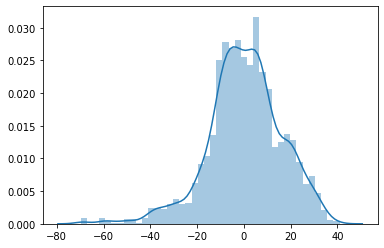

In [21]:
prediction = ridge_regressor.predict(X_test)
regression_metrics(y_test, prediction)

import seaborn as sns
sns.distplot(y_test - prediction)

In [22]:
#apply lasso rigression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4550029.758237927, tolerance: 2529.955696594559
  positive)
/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4477007.038914363, tolerance: 2547.038071028663
  positive)
/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4644093.949127084, tolerance: 2667.8126904366472
  positive)
/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increas

{'alpha': 1}
-320.82637898585267
MAE: 12.214053814850248
MSE: 262.37973664007154
RMSE: 16.198139912967523


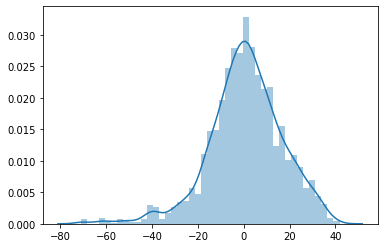

In [23]:
lasso = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
prediction = lasso_regressor.predict(X_test)
regression_metrics(y_test, prediction)
sns.distplot(y_test - prediction)

In [24]:
#save model as pkl file
filename = 'first_innings_score_preditction_lassoreg.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))
